<a href="https://colab.research.google.com/github/Limjaewoo-kor/-DataOrganization_colab/blob/main/%EB%B9%85%EB%B6%84%EA%B8%B0_%EC%BD%94%EB%9E%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  빅분기 2유형
import pandas as pd

train = pd.read_csv("data/customer_train.csv")
test = pd.read_csv("data/customer_test.csv")

# 사용자 코딩 영역

### 데이터 형식 및 값 체크
# print(train.info())
# print(train.describe())
# print(train['환불금액'].value_counts())

### id, target[y]값 확보 및 필요없는 컬럼 제거
tid = test['회원ID'].copy()
y = train['성별'].copy()
train = train.drop(columns=['회원ID','성별'])
test = test.drop(columns=['회원ID'])

### 결측치 확인 및 처리
# print(train['환불금액'].isna().sum())
# print(test['환불금액'].isna().sum())
train['환불금액'] = train['환불금액'].fillna(train['환불금액'].mode()[0])
test['환불금액'] = test['환불금액'].fillna(test['환불금액'].mode()[0])
# print(train.info())


### 수치형 데이터 스케일 MinMaxScaler / StandardScaler
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mmsCol = train.select_dtypes(exclude='object').columns
train[mmsCol] = mms.fit_transform(train[mmsCol])
test[mmsCol] = mms.transform(test[mmsCol])
# print(train[mmsCol])
# print(test[mmsCol])


### 오브젝트형 데이터 스케일 LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['주구매지점'] = le.fit_transform(train['주구매지점'])
test['주구매지점'] = le.transform(test['주구매지점'])
train['주구매상품'] = le.fit_transform(train['주구매상품'])
test['주구매상품'] = le.transform(test['주구매상품'])



# pd.get_dummies() 함수를 사용해도 가능.

### 데이터 분할
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(train,y,test_size=0.2,random_state=2025,stratify=y)

# print(x_train.shape)
# print(x_val.shape)
# print(y_train.shape)
# print(y_val.shape)


### 모델링 및 학습
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
tmpPred = rf.predict(x_val)

# 모델 성능 평가
from sklearn.metrics import roc_auc_score, accuracy_score

roc = roc_auc_score(y_val, tmpPred)
acc = accuracy_score(y_val, tmpPred)

# print(roc) 0.56
# print(acc) 0.62

# 테스트 모델 예측
pred = rf.predict(test)

#결과 제출
result = pd.DataFrame({'pred':pred})
result.to_csv("result.csv", index=False)

#제출한 데이터 확인
chx = pd.read_csv("result.csv")
print(chx)



In [ ]:
# 빅분기 3유형
# # 단일 표본 t-검정.
# from scipy.stats import ttest_1samp
# t_stat, p_value = ttest_1samp(sample, popmean)

# # 독립 표본 t-검정.
# from scipy.stats import ttest_ind
# t_stat, p_value = ttest_ind(group1, group2)

# # 대응 표본 t-검정.
# from scipy.stats import ttest_rel
# t_stat, p_value = ttest_rel(before, after)

# # Shapiro-Wilk 정규성 검정.
# from scipy.stats import shapiro
# stat, p = shapiro(data)

# #  Levene의 등분산 검정.
# from scipy.stats import levene
# stat, p = levene(group1, group2)

# # Wilcoxon 부호 순위 검정.
# from scipy.stats import wilcoxon
# stat, p = wilcoxon(data1, data2)

# # Mann-Whitney U 검정.
# from scipy.stats import mannwhitneyu
# stat, p = mannwhitneyu(data1, data2)

# # 카이제곱 적합도 검정. 수치형 데이터
# from scipy.stats import chisquare
# stat, p = chisquare(f_obs, f_exp)

# # 카이제곱 독립성 검정. 범주형 데이터
# from scipy.stats import chi2_contingency
# stat, p, dof, expected = chi2_contingency(table)

# # 일원 분산 분석 (ANOVA).
# from scipy.stats import f_oneway
# stat, p = f_oneway(group1, group2, group3)

# # 최소제곱회귀(Ordinary Least Squares).
# from statsmodels.formula.api import ols
# model = ols('y ~ x', data).fit()

# # 로지스틱 회귀(Logistic Regression).
# from statsmodels.api import Logit
# model = Logit(y, X).fit()

# # 분산 분석.
# from statsmodels.api import anova_lm
# anova_results = anova_lm(model)



# 새 섹션

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          100 non-null    int64  
 1   Category      100 non-null    object 
 2   Sales         100 non-null    float64
 3   Profit        100 non-null    int64  
 4   Customer_Age  100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB
이상치 개수: 9개


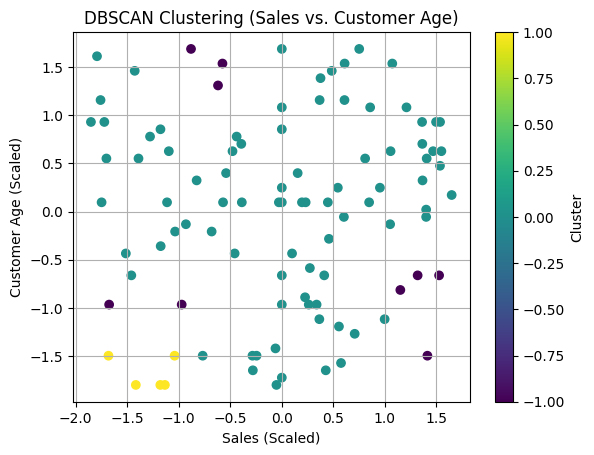

이상치의 평균 매출과 연령:
Sales           2802.444444
Customer_Age      40.222222
dtype: float64


In [ ]:
# 개인 정리 ML / 데이터 분석

#################################   1과목  파이썬 데이터 분석  #################################
# import pandas as pd
# # 1. Pandas로 데이터 처리
# # CSV 파일 불러오기:
# df = pd.read_csv('sample_data/fake_sales_data.csv')
# print(df.head())  # 상위 5개 데이터 미리보기
# df2 = df.copy()
# df2.drop('Category', inplace=True, axis=1)
# print(df2.info())

# # 기본 정보 조회:
# print('--------------------------------------------------------------------------------------')
# df.info()
# df.Sales.isnull().sum()
# print('--------------------------------------------------------------------------------------')
# df.describe()
# print('--------------------------------------------------------------------------------------')
# # 결측치 처리:
# df.info()
# df.dropna()  # 결측치 제거
# df.fillna(0,inplace=True)  # 결측치 0으로 대체
# df.info()
# # 1-2. 데이터 정제 및 변형
# # 데이터 변형 (Melt, Pivot):
# # Pivot 예시
# df_pivot = df.pivot_table(index='Category', columns='Year', values='Sales', aggfunc='sum')


# # 그룹화와 집계:
# df.groupby('Category')['Sales'].sum()


# # 2. NumPy로 성능 최적화
# # 배열 생성:
# import numpy as np
# arr = np.array([1, 2, 3, 4, 5])

# # 벡터화 연산:
# arr = arr * 2  # 반복문 없이 전체에 곱셈 적용
# print(arr)




# 3. 데이터 시각화 (Matplotlib & Seaborn)
# 라인 차트:
# import matplotlib.pyplot as plt

# plt.plot(df['Year'], df['Sales'])
# plt.title('Sales Trend')
# plt.show()

# # 바 차트:
# df['Category'].value_counts().plot(kind='bar')


# # 3-2. 고급 시각화 (Seaborn)
# # 히트맵:
# import seaborn as sns
# # sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')


# # 박스플롯:
# sns.boxplot(x='Category', y='Sales', data=df)


# 4. 실습 예제
# 실습 1: 데이터 정제 및 변형
# 목표: 결측치 처리 및 집계.
# df2.fillna(df2.mean(), inplace=True)
# print(df2.info())

# 실습 2: 시각화
# 목표: Seaborn으로 상관관계 히트맵 작성.
# sns.heatmap(df2.corr(), annot=True)


# category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# yearly_avg_sales = df.groupby('Year')['Sales'].mean()

# import matplotlib.pyplot as plt

# category_sales.plot(kind='bar', title='Category Total Sales')
# plt.xlabel('Category')
# plt.ylabel('Sales')
# plt.show()

# yearly_avg_sales.plot(kind='line', marker='o', title='Year mean Sales')
# plt.xlabel('Year')
# plt.ylabel('Average Sales')
# plt.grid()
# plt.show()

# import seaborn as sns

# sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('corr')
# plt.show()





#################################   2과목 통계와 머신러닝    #################################

################################# 2_1. 통계와 머신러닝 #################################

# 1. 통계적 분석 기법
# 1.1. 가설 검정 (t-test, ANOVA)
# 목표: 두 집단 간 차이가 유의미한지 검정.
# 예시:
# t-test: 전자 제품과 책 카테고리의 평균 매출 비교.
# ANOVA: 카테고리별 매출 차이 검정.

# # 기본세팅
# df = pd.read_csv('sample_data/fake_sales_data.csv')
# df2 = df.copy()
# df2.drop('Category', inplace=True, axis=1)
# df2.fillna(df2.mean(), inplace=True)

# # 1.2. 상관 분석 (Correlation)
# # 목표: 매출과 이익, 연령 간의 상관 관계 파악.
# correlation = df2.corr()


# 2. 머신러닝 기초 - 예측 모델 구축
# 2.1. 데이터 전처리
# 목표: 머신러닝에 적합하게 데이터 변환.
# 방법: 카테고리 컬럼을 더미 변수로 변환.

# 2.2. 회귀 분석 (Linear Regression)
# 목표: 매출 예측 모델 구축.
# 특징:
# 독립 변수: 연도, 카테고리, 고객 연령.
# 종속 변수: 매출 (Sales).

# 2.3. 예측 모델 평가
# 평가지표: MSE (평균 제곱 오차), R² (설명력).

# 3. 실습 계획
# 상관 분석: 매출과 이익의 상관계수 계산.
# 회귀 모델: 매출 예측을 위한 회귀 모델 구축.
# 평가: 예측 정확도 분석.


# 1. 상관관계 분석 결과
# print(correlation)
# 컬럼	Sales와의 상관계수
# Year	-0.052
# Profit	0.002
# Customer_Age	0.070
# 해석:
# 매출과 이익 간의 상관관계는 거의 없음.
# 고객 연령과 매출 간의 상관관계도 약함.


# x = df2.drop('Sales', axis=1)
# y = df2.Sales

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# # from sklearn.linear_model import LinearRegression
# # model = LinearRegression()
# # model.fit(X_train, y_train)
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # 학습된 모델이 X_test 데이터를 보고 예측한 매출 값입니다.
# # y_test: 실제 매출
# # y_pred: 예측된 매출
# y_pred = model.predict(X_test)

# from sklearn.metrics import mean_squared_error
# # 실제 값과 예측 값의 차이를 제곱해 평균낸 값.
# # 값이 작을수록 예측이 정확하다는 뜻!
# mse = mean_squared_error(y_test, y_pred)
# print(f"mse : {mse}")
# # 0 ~ 1: 모델이 데이터를 얼마나 잘 설명하는지 (1에 가까울수록 좋음).
# # 음수: 예측이 오히려 평균 이하라는 뜻.
# from sklearn.metrics import r2_score
# r2 = r2_score(y_test, y_pred)
# print(f"r2 : {r2}")

# 회귀 계수
# print(f"model.coef_ : {model.coef_}")
#  절편 (Intercept)
# print(f"model.intercept_ : {model.intercept_}")

# 정리
# correlation: 변수들 간의 상관관계 분석.
# mse, r2: 회귀 모델의 예측 정확도 평가.
# model.coef_, model.intercept_: 각 변수의 영향력과 기본 예측 값.




################################# 2_2. 비지도학습 #################################

# 비지도학습을 통해 데이터의 숨겨진 패턴 탐색.
# 군집화를 활용해 고객 세분화나 특성 파악.

# 비지도학습에서 배울 내용
####### K-평균 군집화 (K-Means Clustering)
# 목표: 유사한 특성을 가진 데이터를 같은 그룹으로 묶기.
# 실습: 고객 연령과 매출을 기준으로 군집화.
# -- 최적의 클러스터 개수 찾기 (Elbow Method).

####### DBSCAN (밀도 기반 군집화)
# 목표: 이상치가 있는 데이터를 안정적으로 군집화.
# 실습: 매출 이상치 탐지 및 군집화.
# -- 밀도 기반으로 안정적인 군집화.

####### 군집 결과 시각화
# 2D 산점도: 고객 세그먼트별 매출 분포.
# -- 산점도와 클러스터별 특징 분석.


####### K-평균 군집화 (K-Means Clustering) #######
# 기본세팅
# import pandas as pd
# df = pd.read_csv('sample_data/fake_sales_data.csv')
# df2 = df.copy()
# df2.fillna(df2['Sales'].mean())

# # 결측치 처리
# df2['Sales'] = df2['Sales'].fillna(df2['Sales'].mean())
# df2['Customer_Age'] = df2['Customer_Age'].fillna(df2['Customer_Age'].median())
# df2.info()

# # 데이터 전처리 (카테고리 → 더미 변수 변환)
# df_encoded = pd.get_dummies(df2, columns=['Category'], drop_first=True)


# # 군집화에 사용할 특성 선택 (연령과 매출)
# X = df_encoded[['Sales', 'Customer_Age']]

# # 데이터 스케일링 (군집화 성능 향상을 위해)
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # 최적의 클러스터 개수 찾기 (Elbow Method)
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# inertia = []
# K_range = range(1, 11)
# for k in K_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X_scaled)
#     inertia.append(kmeans.inertia_)

# # Elbow Method 시각화
# plt.plot(K_range, inertia, marker='o')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia')
# plt.grid()
# plt.show()


# # K-평균 군집화 (K=3 가정)
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans.fit(X_scaled)

# # 군집 라벨 추가
# df_encoded['Cluster'] = kmeans.labels_

# # 군집 결과 시각화 (2D 산점도)
# plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
# plt.title('K-Means Clustering (Sales vs. Customer Age)')
# plt.xlabel('Sales (Scaled)')
# plt.ylabel('Customer Age (Scaled)')
# plt.colorbar(label='Cluster')
# plt.grid()
# plt.show()

# # 각 군집의 평균 매출과 연령 출력
# cluster_summary = df_encoded.groupby('Cluster')[['Sales', 'Customer_Age']].mean()
# print(cluster_summary)


####### DBSCAN을 이용한 이상치 탐지 #######

# 기본세팅
import pandas as pd
df = pd.read_csv('sample_data/fake_sales_data.csv')
df2 = df.copy()
df2.fillna(df2['Sales'].mean())

# 결측치 처리
df2['Sales'] = df2['Sales'].fillna(df2['Sales'].mean())
df2['Customer_Age'] = df2['Customer_Age'].fillna(df2['Customer_Age'].median())
df2.info()

# 데이터 전처리 (카테고리 → 더미 변수 변환)
df_encoded = pd.get_dummies(df2, columns=['Category'], drop_first=True)

# 군집화에 사용할 특성 선택 (연령과 매출)
X = df_encoded[['Sales', 'Customer_Age']]

# 데이터 스케일링 (군집화 성능 향상을 위해)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


from sklearn.cluster import DBSCAN
# DBSCAN 모델 설정 (eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 이상치와 군집 결과 추가
df_encoded['DBSCAN_Cluster'] = dbscan_labels

# 이상치 개수 확인 (-1이 이상치)
outlier_count = (dbscan_labels == -1).sum()
print(f"이상치 개수: {outlier_count}개")


import matplotlib.pyplot as plt
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering (Sales vs. Customer Age)')
plt.xlabel('Sales (Scaled)')
plt.ylabel('Customer Age (Scaled)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

outlier_summary = df_encoded[df_encoded['DBSCAN_Cluster'] == -1][['Sales', 'Customer_Age']].mean()
print("이상치의 평균 매출과 연령:")
print(outlier_summary)
